In [29]:
import pandas as pd
import numpy as np
import janitor
import gc
import time
import matplotlib.pyplot as plt

### Overall turnout

#### All cities

In [30]:
state = 'CA' ##california
#state = 'CO' ##colorado
#state = 'MD' ##maryland
#state = 'ME' ##maine
#state = 'MN' ##minnesota
# state = 'NM' ##new mexico
#state = 'UT' ##utah
#state = 'VT' ##vermont

# read in data

if state == 'CA':
    path = '../data/VM2--CA--2022-04-25/'
    data = pd.read_csv(path + 'voter_turnout_merged_CA.csv')
if state == 'CO':
    path = '../data/VM2--CO--2022-04-26/'
    data = pd.read_csv(path + 'voter_turnout_merged_CO.csv')
if state == 'MD':
    path = '../data/VM2--MD--2022-04-08/'
    data = pd.read_csv(path + 'voter_turnout_merged_MD.csv')
if state == 'ME':
    path = '../data/VM2--ME--2022-03-02/'
    data = pd.read_csv(path + 'voter_turnout_merged_ME.csv')
if state == 'MN':
    path = '../data/VM2--MN--2022-03-25/'
    data = pd.read_csv(path + 'voter_turnout_merged_MN.csv')
if state == 'NM':
    path = '../data/VM2--NM--2022-03-30/'
    data = pd.read_csv(path + 'voter_turnout_merged_NM.csv')
if state == 'UT':
    path = '../data/VM2--UT--2022-03-30/'
    data = pd.read_csv(path + 'voter_turnout_merged_UT.csv')
if state == 'VT':
    path = '../data/VM2--VT--2022-04-20/'
    data = pd.read_csv(path + 'voter_turnout_merged_VT.csv')


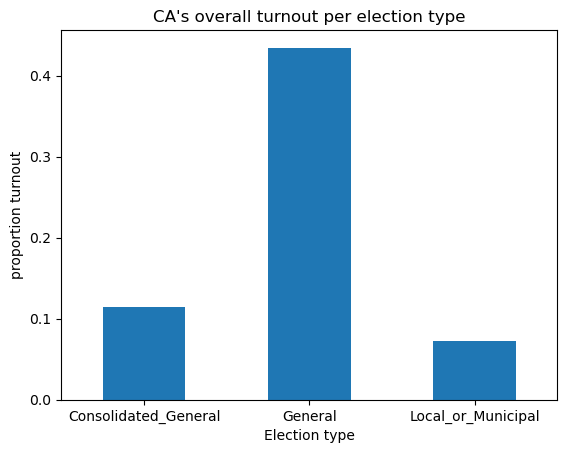

In [31]:
# one graph, with average voter turnout per election type
# read in new merged file for CA

data['overall_turnout_perc'] = data['voted_voters'] / data['voter_population']

# group by election type, get average overall_turnout_perc

avg_turnout = data.groupby(['elec_type']).mean()['overall_turnout_perc']

avg_turnout.plot.bar(title=f'{state}\'s overall turnout per election type', 
                     xlabel='Election type', 
                     ylabel='proportion turnout',
                     rot=0)
plt.show()

#### RCV vs. Non-RCV cities

In [32]:
# separate data into RCV and non-RCV

def get_data(state):

    if state == 'CA':
        path = '../data/VM2--CA--2022-04-25/'
        data = pd.read_csv(path + 'voter_turnout_merged_CA.csv')
        
        RCV_cities = ['San Francisco',
         'Oakland',
         'Berkeley',
         'San Leandro',
         'Palm Desert',
         'Eureka',
         'Albany']

        nonRCV_cities = ['Fresno',
         'San Diego',
         'Sacramento',
         'Riverside',
         'San Jose',
         'Santa Ana',
         'Anaheim',
         'Santa Rosa',
         'Merced',
         'Santa Clarita',
         'Alhambra',
         'Davis',
         'Montebello',
         'Burbank',
         'Huntington Park',
         'Bellflower',
         'Watsonville',
         'Gilroy',
         'Whittier',
         'Lynwood',
         'Lakewood',
         'Pico Rivera',
         'Lake Forest',
         'Livermore',
         'Chino Hills',
         'Paramount',
         'El Paso de Robles',
         'Pico Rivera',
         'Buena Park',
         'Whittier',
         'Calabasas',
         'Carpinteria',
         'Morro Bay',
         'San Carlos',
         'Solvang']

    if state == 'CO':
        path = '../data/VM2--CO--2022-04-26/'
        data = pd.read_csv(path + 'voter_turnout_merged_CO.csv')

        RCV_cities = ['Boulder']

        nonRCV_cities = ['Alamosa', 'Arvada', 'Brighton', 'Broomfield', 'Castle Rock', 
                                    'Canon City', 'Centennial', 'Commerce City', 
                                    'Durango', 'Englewood', 'Fountain', 'Glenwood Springs', 'Golden', 
                                    'Greenwood Village', 'Highlands Ranch', 'Lafayette', 
                                    'Littleton', 'Longmont', 'Louisville', 'Loveland', 'Montrose', 'Northglenn', 
                                    'Parker', 'Silverthorne', 'Steamboat Springs', 'Wheat Ridge', 'Windsor']

    if state == 'MD':
        path = '../data/VM2--MD--2022-04-08/'
        data = pd.read_csv(path + 'voter_turnout_merged_MD.csv')

        RCV_cities = ['Takoma Park']

        nonRCV_cities = ['Adelphi', 'Annapolis', 'Aspen Hill', 'Bethesda', 
                                    'Cockeysville', 'College Park', 'Easton', 
                                    'Hyattsville', 'New Carrollton', 
                                    'North Bethesda', 'North Potomac', 'Ocean Pines', 'Potomac', 
                                    'Princess Anne', 'Severna Park', 'Timonium', 
                                    'Westminster']

    if state == 'ME':
        path = '../data/VM2--ME--2022-03-02/'
        data = pd.read_csv(path + 'voter_turnout_merged_ME.csv')

        RCV_cities = ['Portland']
        nonRCV_cities = ['Sanford', 'Westbrook', 'Lewiston', 'Wells', 'Standish', 'Waterville',
         'Falmouth', 'Windham', 'Kennebunk', 'Scarborough', 'South Portland', 'Bangor',
         'Augusta', 'Brunswick', 'Auburn', 'Biddeford', 'York', 'Saco',
         'Orono', 'Gorham']

    if state == 'MN':
        path = '../data/VM2--MN--2022-03-25/'
        data = pd.read_csv(path + 'voter_turnout_merged_MN.csv')


        RCV_cities = ['Bloomington', 'Minneapolis', 'Minnetonka', 'St. Louis Park']

        nonRCV_cities = ['Alexandria', 'Bemidji', 'Blaine', 'Blaine', 'Brainerd', 'Brainerd', 
                                    'Brooklyn Center', 'Brooklyn Park', 'Brooklyn Park', 'Burnsville', 
                                    'Coon Rapids', 'Coon Rapids', 'Duluth', 'Eagan', 'Eden Prairie', 'Eden Prairie', 
                                    'Fridley', 'Inver Grove Heights', 'Mankato', 'Mankato', 'Maple Grove', 'Maplewood', 
                                    'Moorhead', 'Plymouth', 'Richfield', 'Richfield', 'Rochester', 'Roseville', 
                                    'Roseville', 'St. Cloud', 'St. Paul', 'Winona']

    if state == 'NM':
        path = '../data/VM2--NM--2022-03-30/'
        data = pd.read_csv(path + 'voter_turnout_merged_NM.csv')

        RCV_cities = ['Las Cruces', 'Santa Fe']
        nonRCV_cities = ['Los Alamos', 'Albuquerque', 'Rio Rancho', 'Farmington',
         'Taos', 'Silver City', 'Roswell', 'Lovington', 'Deming',
         'Alamogordo', 'Chaparral', 'Las Vegas', 'Los Lunas', 'Hobbs',
         'Clovis', 'Sunland Park', 'Artesia', 'Grants', 'Carlsbad', 'Portales', 'Gallup',
         'Espanola']

    if state == 'UT':
        path = '../data/VM2--UT--2022-03-30/'
        data = pd.read_csv(path + 'voter_turnout_merged_UT.csv')

        RCV_cities = ['Salt Lake City', 'Sandy', 'Lehi', 'Millcreek', 
                         'Draper', 'Riverton',  'Cottonwood Heights', 
                         'Springville', 'Midvale', 'Magna', 'South Salt Lake', 
                         'Payson', 'Bluffdale']

        nonRCV_cities = ['Ogden', 'Provo', 'West Valley City', 
                                    'Logan', 'St. George', 'Taylorsville', 
                                    'Layton', 'Orem', 'South Jordan', 'Murray', 
                                    'South Jordan', 'Clearfield', 'Spanish Fork', 
                                    'Tooele', 'Kearns', 'Cedar City', 'Murray', 
                                    'Bountiful',  'South Jordan', 'Pleasant Grove', 
                                    'Vernal', 'Hurricane', 'Herriman', 'American Fork', 
                                    'Washington', 'Eagle Mountain', 'Brigham City', 
                                    'American Fork', 'Herriman', 'Spanish Fork', 
                                    'Washington', 'Heber', 'Hurricane', 'Vernal', 
                                    'Holladay', 'Pleasant Grove', 'American Fork', 
                                    'Herriman', 'Eagle Mountain', 'Vernal', 
                                    'Bountiful', 'Pleasant Grove', 'Washington', 
                                    'South Jordan', 'Vernal', 'Tooele', 
                                    'Spanish Fork', 'Clearfield', 'Kearns', 
                                    'Eagle Mountain', 'Washington', 'Bountiful', 
                                    'Pleasant Grove', 'Hurricane', 'Cedar City', 
                                    'Saratoga Springs', 'Kaysville', 'Brigham City', 
                                    'North Salt Lake', 'American Fork', 'Highland', 
                                    'Lindon', 'Alpine', 'West Haven', 'North Logan']

    if state == 'VT':
        path = '../data/VM2--VT--2022-04-20/'
        data = pd.read_csv(path + 'voter_turnout_merged_VT.csv')
        
        RCV_cities = ['Burlington']
        nonRCV_cities = ['South Burlington', 'Essex', 'Rutland', 'Bennington', 'Milton',
         'Essex Junction', 'Barre', 'Colchester', 'Brattleboro']
        
    # calc overall turnout
    data['overall_turnout_perc'] = data['voted_voters'] / data['voter_population']

    data_RCV = data[data['Residence_Addresses_City'].isin(RCV_cities)]
    data_nonRCV = data[data['Residence_Addresses_City'].isin(nonRCV_cities)]
    
    return (data_RCV, data_nonRCV)

(data_RCV, data_nonRCV) = get_data(state)
print(data_RCV.shape)
print(data_nonRCV.shape)

(36, 69)
(156, 69)


In [33]:
# get averages
avg_turnout_RCV = data_RCV.groupby(['elec_type']).mean()['overall_turnout_perc']
avg_turnout_nonRCV = data_nonRCV.groupby(['elec_type']).mean()['overall_turnout_perc']

# make df
df1 = avg_turnout_nonRCV.to_frame(name='avg_turnout_nonRCV')
df2 = avg_turnout_RCV.to_frame(name='avg_turnout_RCV')
df = df1.merge(df2, on='elec_type', how='outer')
df = df.reset_index()

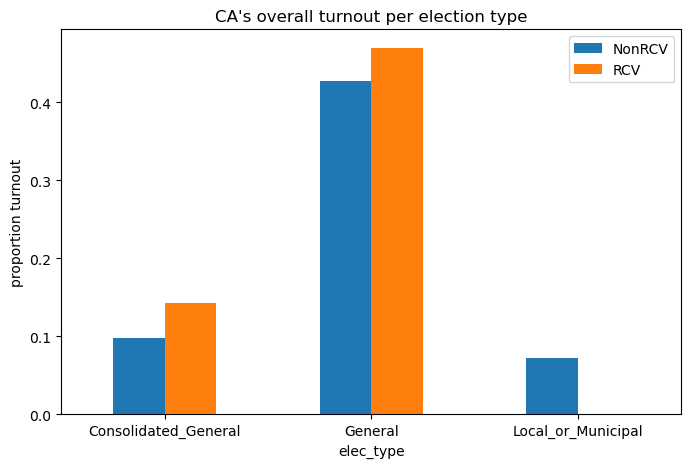

In [34]:
# graph

fig = df.plot(x='elec_type',
              kind='bar',
              stacked=False,
              title=f'{state}\'s overall turnout per election type',
              figsize=(8, 5),
              rot=0, legend = None, ylabel = "proportion turnout").\
              legend(["NonRCV", "RCV"]).get_figure()
fig.savefig(f'{path}{state}_elec_turnout_overall.jpg')
    


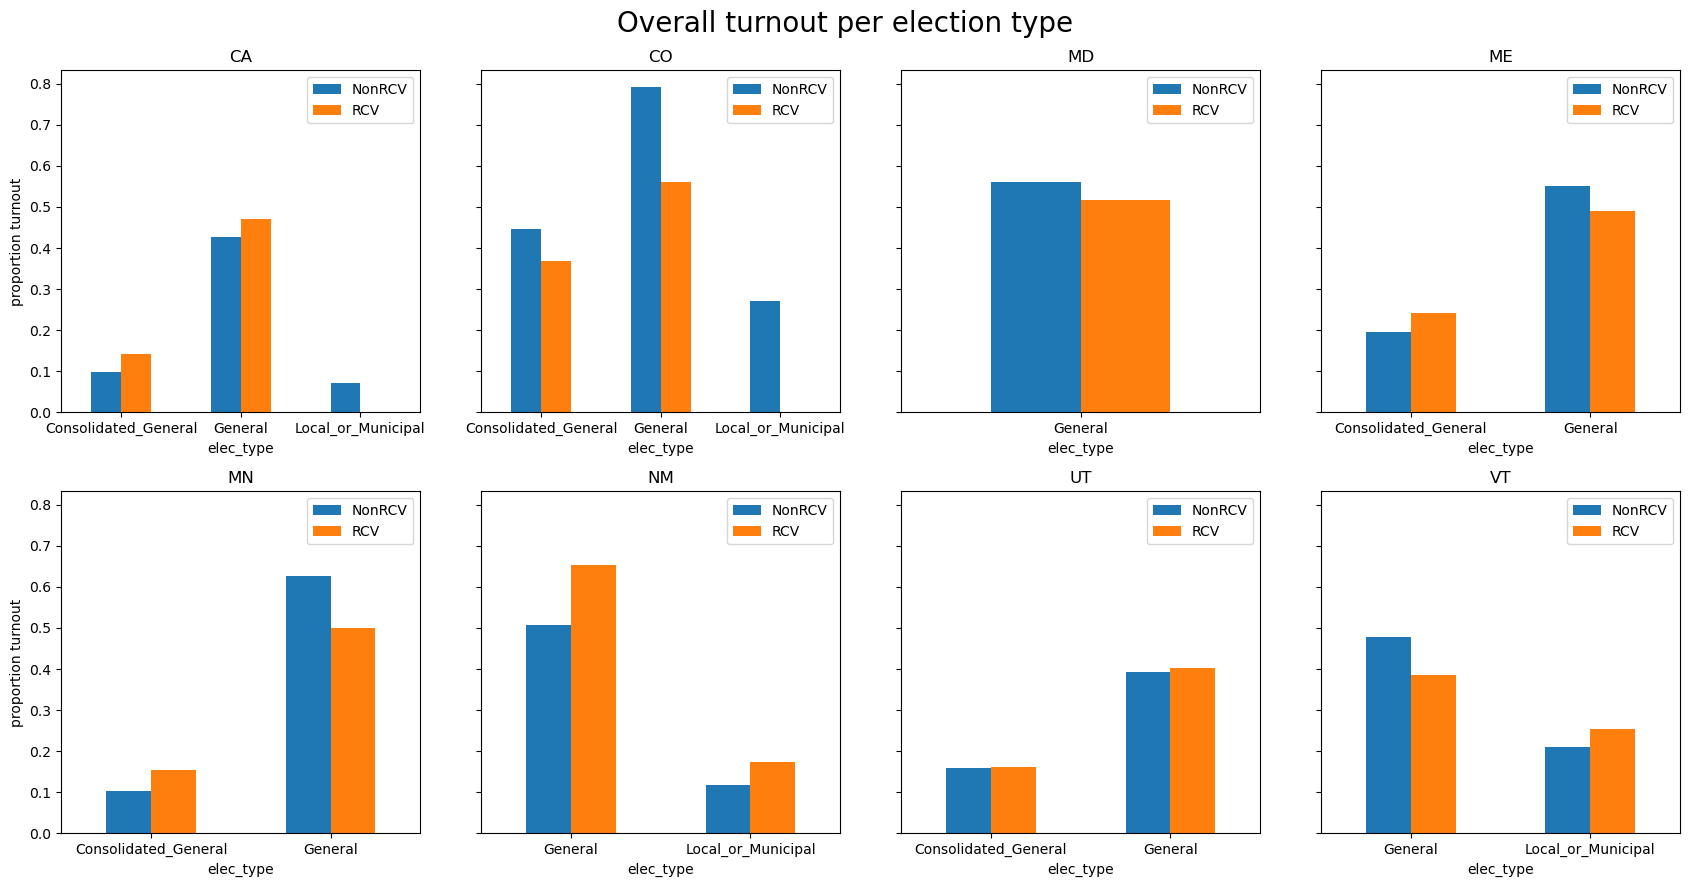

In [35]:
# graph all states together
states =['CA', 'CO','MD','ME','MN','NM', 'UT', 'VT']

fig, axes = plt.subplots(2, 4, sharey=True, figsize=(17,9))
fig.suptitle('Overall turnout per election type', fontsize=20)


for (state, ax) in zip(states, axes.ravel()):
    # get data
    (data_RCV, data_nonRCV) = get_data(state)
    
    # get averages
    avg_turnout_RCV = data_RCV.groupby(['elec_type']).mean()['overall_turnout_perc']
    avg_turnout_nonRCV = data_nonRCV.groupby(['elec_type']).mean()['overall_turnout_perc']

    # make df
    df1 = avg_turnout_nonRCV.to_frame(name='avg_turnout_nonRCV')
    df2 = avg_turnout_RCV.to_frame(name='avg_turnout_RCV')
    df = df1.merge(df2, on='elec_type', how='outer')
    df = df.reset_index()
    
    # plot
    df.plot(x='elec_type',
              kind='bar',
              stacked=False,
              ax=ax,
              title=f'{state}',
              rot=0, legend = None, ylabel = "proportion turnout").\
              legend(["NonRCV", "RCV"])
    


fig.tight_layout()

fig.savefig(f'{path}elec_turnout_overall.jpg')


In [36]:
# graph turnout over all states combined

# function to get all data
def get_data_all():
    data = pd.read_csv('../data/voter_turnout_merged_all_states.csv')

    # split by RCV and nonRCV
    RCV_cities = ['San Francisco',
         'Oakland',
         'Berkeley',
         'San Leandro',
         'Palm Desert',
         'Eureka',
         'Albany', 'Boulder','Takoma Park','Portland', 'Bloomington', 'Minneapolis', 'Minnetonka', 
         'St. Louis Park', 'Las Cruces', 'Santa Fe', 'Salt Lake City', 'Sandy', 'Lehi', 'Millcreek', 
                         'Draper', 'Riverton',  'Cottonwood Heights', 
                         'Springville', 'Midvale', 'Magna', 'South Salt Lake', 
                         'Payson', 'Bluffdale', 'Burlington']

    nonRCV_cities = ['Fresno',
         'San Diego',
         'Sacramento',
         'Riverside',
         'San Jose',
         'Santa Ana',
         'Anaheim',
         'Santa Rosa',
         'Merced',
         'Santa Clarita',
         'Alhambra',
         'Davis',
         'Montebello',
         'Burbank',
         'Huntington Park',
         'Bellflower',
         'Watsonville',
         'Gilroy',
         'Whittier',
         'Lynwood',
         'Lakewood',
         'Pico Rivera',
         'Lake Forest',
         'Livermore',
         'Chino Hills',
         'Paramount',
         'El Paso de Robles',
         'Pico Rivera',
         'Buena Park',
         'Whittier',
         'Calabasas',
         'Carpinteria',
         'Morro Bay',
         'San Carlos',
         'Solvang', 'Alamosa', 'Arvada', 'Brighton', 'Broomfield', 'Castle Rock', 
         'Canon City', 'Centennial', 'Commerce City', 
         'Durango', 'Englewood', 'Fountain', 'Glenwood Springs', 'Golden', 
         'Greenwood Village', 'Highlands Ranch', 'Lafayette', 
         'Littleton', 'Longmont', 'Louisville', 'Loveland', 'Montrose', 'Northglenn', 
         'Parker', 'Silverthorne', 'Steamboat Springs', 'Wheat Ridge', 'Windsor', 'Adelphi', 
                         'Annapolis', 'Aspen Hill', 'Bethesda', 
                        'Cockeysville', 'College Park', 'Easton', 
                        'Hyattsville', 'New Carrollton', 
                        'North Bethesda', 'North Potomac', 'Ocean Pines', 'Potomac', 
                        'Princess Anne', 'Severna Park', 'Timonium', 
                        'Westminster', 'Sanford', 'Westbrook', 'Lewiston', 'Wells', 'Standish', 'Waterville',
                     'Falmouth', 'Windham', 'Kennebunk', 'Scarborough', 'South Portland', 'Bangor',
                     'Augusta', 'Brunswick', 'Auburn', 'Biddeford', 'York', 'Saco',
                     'Orono', 'Gorham', 'Alexandria', 'Bemidji', 'Blaine', 'Blaine', 'Brainerd', 'Brainerd', 
                    'Brooklyn Center', 'Brooklyn Park', 'Brooklyn Park', 'Burnsville', 
                    'Coon Rapids', 'Coon Rapids', 'Duluth', 'Eagan', 'Eden Prairie', 'Eden Prairie', 
                    'Fridley', 'Inver Grove Heights', 'Mankato', 'Mankato', 'Maple Grove', 'Maplewood', 
                    'Moorhead', 'Plymouth', 'Richfield', 'Richfield', 'Rochester', 'Roseville', 
                    'Roseville', 'St. Cloud', 'St. Paul', 'Winona', 'Los Alamos', 'Albuquerque', 'Rio Rancho', 
                         'Farmington','Taos', 'Silver City', 'Roswell', 'Lovington', 'Deming',
                   'Alamogordo', 'Chaparral', 'Las Vegas', 'Los Lunas', 'Hobbs',
                   'Clovis', 'Sunland Park', 'Artesia', 'Grants', 'Carlsbad', 'Portales', 'Gallup',
                   'Espanola', 'Ogden', 'Provo', 'West Valley City', 
                                    'Logan', 'St. George', 'Taylorsville', 
                                    'Layton', 'Orem', 'South Jordan', 'Murray', 
                                    'South Jordan', 'Clearfield', 'Spanish Fork', 
                                    'Tooele', 'Kearns', 'Cedar City', 'Murray', 
                                    'Bountiful',  'South Jordan', 'Pleasant Grove', 
                                    'Vernal', 'Hurricane', 'Herriman', 'American Fork', 
                                    'Washington', 'Eagle Mountain', 'Brigham City', 
                                    'American Fork', 'Herriman', 'Spanish Fork', 
                                    'Washington', 'Heber', 'Hurricane', 'Vernal', 
                                    'Holladay', 'Pleasant Grove', 'American Fork', 
                                    'Herriman', 'Eagle Mountain', 'Vernal', 
                                    'Bountiful', 'Pleasant Grove', 'Washington', 
                                    'South Jordan', 'Vernal', 'Tooele', 
                                    'Spanish Fork', 'Clearfield', 'Kearns', 
                                    'Eagle Mountain', 'Washington', 'Bountiful', 
                                    'Pleasant Grove', 'Hurricane', 'Cedar City', 
                                    'Saratoga Springs', 'Kaysville', 'Brigham City', 
                                    'North Salt Lake', 'American Fork', 'Highland', 
                                    'Lindon', 'Alpine', 'West Haven', 'North Logan','South Burlington', 
                         'Essex', 'Rutland', 'Bennington', 'Milton',
                        'Essex Junction', 'Barre', 'Colchester', 'Brattleboro']

    # calc overall turnout
    data['overall_turnout_perc'] = data['voted_voters'] / data['voter_population']

    data_RCV = data[data['Residence_Addresses_City'].isin(RCV_cities)]
    data_nonRCV = data[data['Residence_Addresses_City'].isin(nonRCV_cities)]
    
    return (data_RCV, data_nonRCV)

# call function
(data_RCV, data_nonRCV) = get_data_all()

# get averages
avg_turnout_RCV = data_RCV.groupby(['elec_type']).mean()['overall_turnout_perc']
avg_turnout_nonRCV = data_nonRCV.groupby(['elec_type']).mean()['overall_turnout_perc']

# make df
df1 = avg_turnout_nonRCV.to_frame(name='avg_turnout_nonRCV')
df2 = avg_turnout_RCV.to_frame(name='avg_turnout_RCV')
df = df1.merge(df2, on='elec_type', how='outer')
df = df.reset_index()

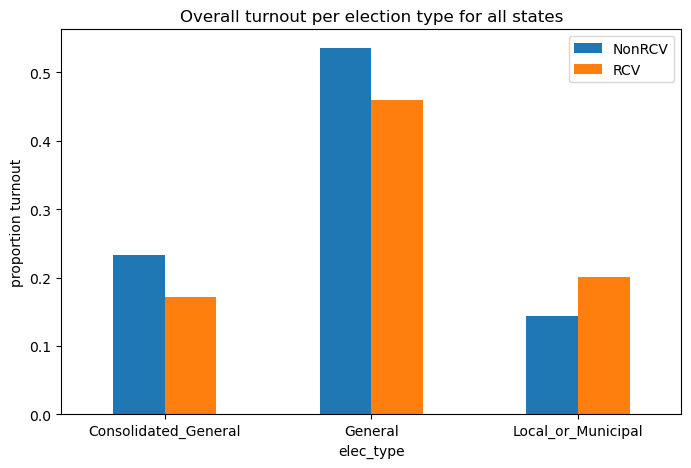

In [37]:
# plot
fig = df.plot(x='elec_type',
              kind='bar',
              stacked=False,
              title='Overall turnout per election type for all states',
              figsize=(8, 5),
              rot=0, legend = None, ylabel = "proportion turnout").\
              legend(["NonRCV", "RCV"]).get_figure()
fig.savefig('../data/elec_turnout_overall_all_states.jpg')


## Avg number of donations per person

In [38]:
# generate graph for one state

state = 'CA' ##california
#state = 'CO' ##colorado
#state = 'MD' ##maryland
#state = 'ME' ##maine
#state = 'MN' ##minnesota
# state = 'NM' ##new mexico
#state = 'UT' ##utah
#state = 'VT' ##vermont

# get data
(data_RCV, data_nonRCV) = get_data(state)

# Make avg donation amt per person columns
data_RCV['avg_donation_amt_per_person'] = data_RCV['FECDonors_TotalDonationsAmount'] / data_RCV['voter_population']
data_nonRCV['avg_donation_amt_per_person'] = data_nonRCV['FECDonors_TotalDonationsAmount'] / data_nonRCV['voter_population']

# Get mean of averages across election
avg_donation_RCV = data_RCV.groupby(['elec_type']).mean()['avg_donation_amt_per_person']
avg_donation_nonRCV = data_nonRCV.groupby(['elec_type']).mean()['avg_donation_amt_per_person']

# make df
df1 = avg_donation_nonRCV.to_frame(name='avg_donation_amt_nonRCV')
df2 = avg_donation_RCV.to_frame(name='avg_donation_amt_RCV')
df = df1.merge(df2, on='elec_type', how='outer')
df = df.reset_index()

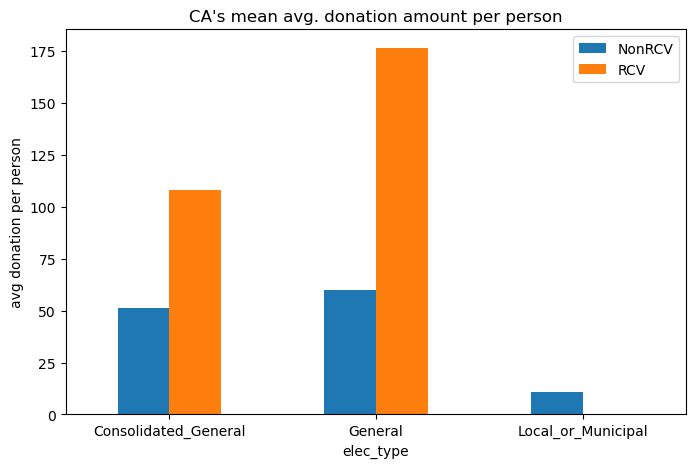

In [39]:
fig = df.plot(x='elec_type',
              kind='bar',
              stacked=False,
              title=f'{state}\'s mean avg. donation amount per person',
              figsize=(8, 5),
              rot=0, legend = None, ylabel = "avg donation per person").\
              legend(["NonRCV", "RCV"]).get_figure()
fig.savefig(f'{path}{state}_avg_donation_amt.jpg')

### For all states

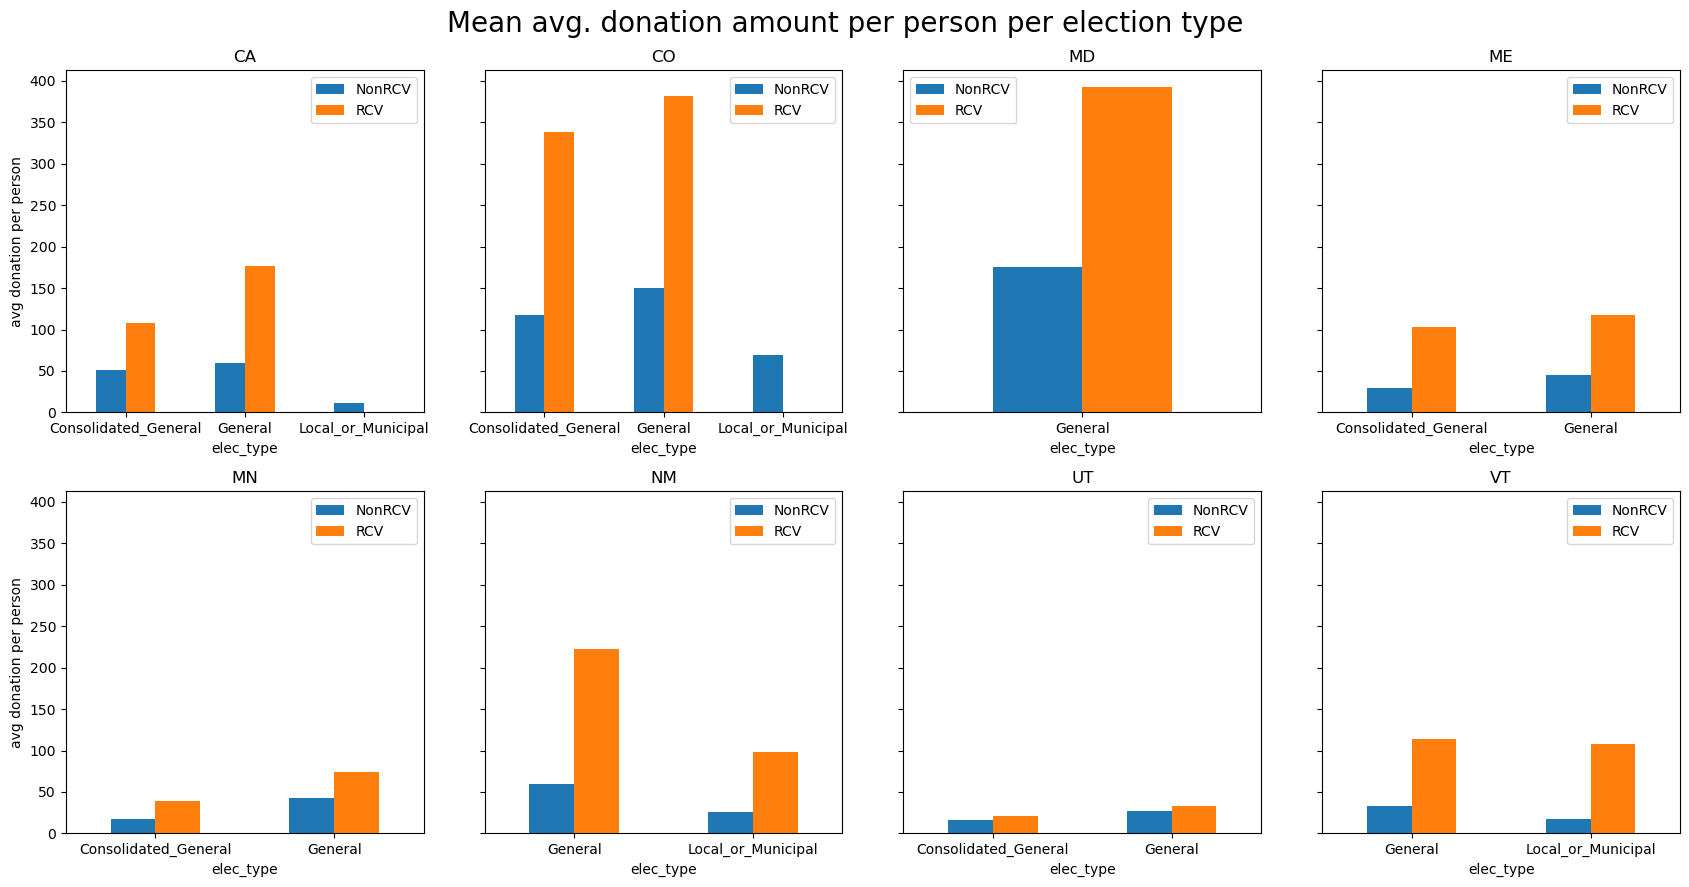

In [40]:
# graph all states together
states =['CA', 'CO','MD','ME','MN','NM', 'UT', 'VT']

fig, axes = plt.subplots(2, 4, sharey=True, figsize=(17,9))
fig.suptitle('Mean avg. donation amount per person per election type', fontsize=20)

for (state, ax) in zip(states, axes.ravel()):
    # get data
    (data_RCV, data_nonRCV) = get_data(state)
    
    # Make avg donation amt per person columns
    data_RCV['avg_donation_amt_per_person'] = data_RCV['FECDonors_TotalDonationsAmount'] / data_RCV['voter_population']
    data_nonRCV['avg_donation_amt_per_person'] = data_nonRCV['FECDonors_TotalDonationsAmount'] / data_nonRCV['voter_population']

    # Get mean of averages across election
    avg_donation_RCV = data_RCV.groupby(['elec_type']).mean()['avg_donation_amt_per_person']
    avg_donation_nonRCV = data_nonRCV.groupby(['elec_type']).mean()['avg_donation_amt_per_person']

    # make df
    df1 = avg_donation_nonRCV.to_frame(name='avg_donation_amt_nonRCV')
    df2 = avg_donation_RCV.to_frame(name='avg_donation_amt_RCV')
    df = df1.merge(df2, on='elec_type', how='outer')
    df = df.reset_index()
    
    # plot
    df.plot(x='elec_type',
              kind='bar',
              stacked=False,
              ax=ax,
              title=f'{state}',
              rot=0, legend = None, ylabel = "avg donation per person").\
              legend(["NonRCV", "RCV"])


fig.tight_layout()


path = '../data/'
fig.savefig(f'{path}avg_donation_amt.jpg')

### Overall across all states

In [41]:
# get data
(data_RCV, data_nonRCV) = get_data_all()


# Make avg donation amt per person columns
data_RCV['avg_donation_amt_per_person'] = data_RCV['FECDonors_TotalDonationsAmount'] / data_RCV['voter_population']
data_nonRCV['avg_donation_amt_per_person'] = data_nonRCV['FECDonors_TotalDonationsAmount'] / data_nonRCV['voter_population']

# Get mean of averages across election
avg_donation_RCV = data_RCV.groupby(['elec_type']).mean()['avg_donation_amt_per_person']
avg_donation_nonRCV = data_nonRCV.groupby(['elec_type']).mean()['avg_donation_amt_per_person']

# make df
df1 = avg_donation_nonRCV.to_frame(name='avg_donation_amt_nonRCV')
df2 = avg_donation_RCV.to_frame(name='avg_donation_amt_RCV')
df = df1.merge(df2, on='elec_type', how='outer')
df = df.reset_index()


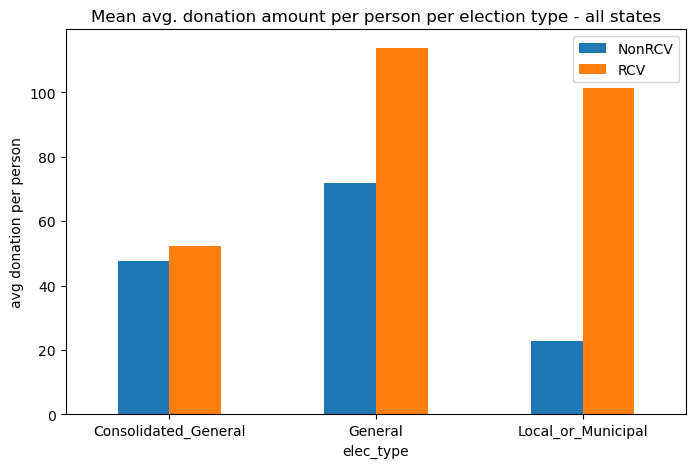

In [42]:
# plot
fig = df.plot(x='elec_type',
              kind='bar',
              stacked=False,
              title='Mean avg. donation amount per person per election type - all states',
              figsize=(8, 5),
              rot=0, legend = None, ylabel = "avg donation per person").\
              legend(["NonRCV", "RCV"]).get_figure()
fig.savefig('../data/avg_donation_amt_all_states.jpg')
